# Quantitative Trading Toolbox (2) --- P&L Calculation for a Strategy

__To learn more, join us here:__


* Learn the foundations of *algorithmic trading* and build your own trading systems: [Quantitative Trading Like a Pro: Essential Python Course](https://www.udemy.com/course/python-for-traders-and-investors/?referralCode=D26278FF40FCB735C68C)

* Unlock the Futures Markets: [Back to the Futures: Futures Trading 101](https://www.udemy.com/course/back-to-the-futures/?referralCode=8C9EDF0AFCC33A25F7B0)

__Coupon codes can be found [here](http://aaaquants.com/courses/):__ 

In [2]:
import numpy as np
import pylab as plt

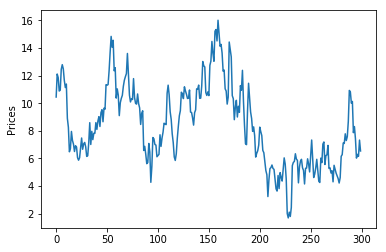

In [3]:
# Let's create an arbitrary price series from normally distributed random numbers. 
# Of course, you can replace this with your downloaded historical data. 
np.random.seed(28)
N = 300
rets = np.random.randn(N)
prices = np.cumsum(rets)+10
plt.plot(prices);
plt.ylabel('Prices');

### The Backtest --- a simple Moving Average Crossover strategy
Whenever the two moving averages cross we change from short to long and vice versa. 

In [4]:
# Current position. '0': not in position. '1': in long position. '-1': in short position
inpos = 0

# Positions
pos = []

# Prices 
px = []

# Realised PnL
rlzd = []

# Exit times
t = [] 

# Moving Average windows
MA = [3, 9]

In [5]:
for i in range(max(MA)+1, N):
    # The Moving Averages:
    ma1 = np.mean(prices[i-MA[0]:i])
    ma2 = np.mean(prices[i-MA[1]:i])
    
    pos.append(inpos)
    px.append(prices[i])

    if ma1 > ma2:
        if inpos != -1: # If we are not in a short position
            if inpos: # If we are in a long position, now we exit:
                rlzd.append(prices[i]-entry)
                # Record the exit times
                t.append(i)
            
            # Enter a short position
            entry = prices[i]
            inpos = -1

    else:
        if inpos != 1: # If we are not in a long position    
            if inpos:
                rlzd.append(entry-prices[i])
                t.append(i)

            # Enter a long position
            entry = prices[i]
            inpos = 1

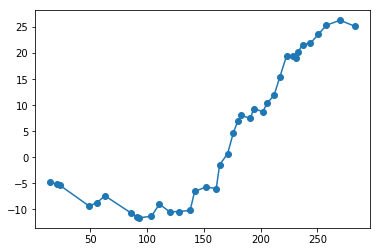

In [6]:
# Realised PnL
plt.plot(np.array(t)-max(MA)-2, np.cumsum(rlzd), '-o');

In [10]:
# Unrealised PnL
unrlzd = np.cumsum(np.multiply(np.diff(px), pos[1:]))

In [11]:
# Compare the final realised and the final unrealised PnL:
final_unrlzd = unrlzd[-1]
print(final_unrlzd, sum(rlzd))

24.281491112572287 25.16798661594224


(-15, -5)

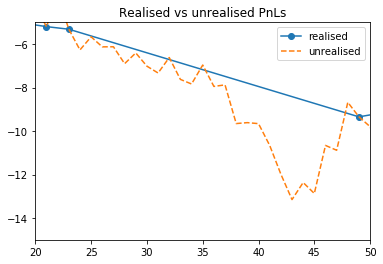

In [9]:
# Compare the realised and unrealised PnLs:
plt.plot(np.array(t)-max(MA)-2, np.cumsum(rlzd), '-o')
plt.plot(unrlzd,'--')
plt.title('Realised vs unrealised PnLs')
plt.legend(['realised', 'unrealised']);

# To zoom in:
#plt.xlim([20,50])
#plt.ylim([-15,-5])